# Lab 2

## Objectives
- Perform intensity transformations for an image
- Perform histogram processing incl. equalization, matching, and adaptive equalization

In [1]:
from skimage import io, exposure
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

## Question 1

Intensity transformation of grayscale images.

1a) Write a function (g, map) = intXform(f, mode, param) for transforming the intensities of an input 8-bit
grayscale image f. The intensities of f (and output image g) are assumed to be in the range (0,1). The type of
transformation performed is specified in parameter mode, a character string with values: ‘negative’, ‘log’,
or ‘gamma’. These specifications implement the intensity transformations given in the lecture slides, i.e.,
equations (1), (2), and (3) with c = 1.0, and γ in equation (3) is specified by the argument param. On the
output, g is the output image, and map is the transformation function computed by intXform. (Note the
need of conversion between dynamic ranges (0,L−1) and (0,1).)

In [2]:
def intXform(f, mode, param = 1.0):
    c = 1.0
    # Normalize input
    norm_input = minmax_scale(f)

    # Define the different transformations
    xform = lambda x : x
    if mode == 'negative':
        xform = lambda r : -r + 1.0
    if mode == 'log':    
        xform = lambda r : c * np.log(r + 1.0)
    if mode == 'gamma':
        xform = lambda r : c*r**param
    
    # Apply the transformation on each pixel
    g = np.array(list(map(xform, norm_input)))

    return minmax_scale(g), xform

1b) Read and display the image spillway-dark.tif. Apply a log transformation function to it. Display the result

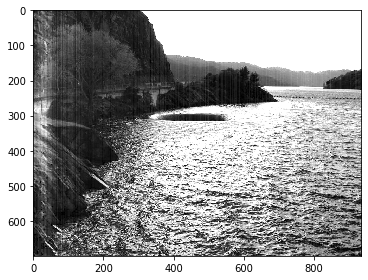

In [3]:
img = io.imread("spillway-dark.tif")
log_img , log_xform = intXform(img, 'log')
io.imshow(log_img)

1c) See if you can improve the result by using a gamma transformation. Display your result

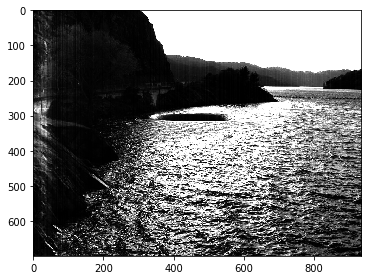

In [4]:
gamma_img, gamma_xform = intXform(img, 'gamma', 1.8)
io.imshow(gamma_img)

1d) Is there any improvement from using log transformation to using gamma transformation? Why (plot the
map to see the difference between the two transformation functions computed.)

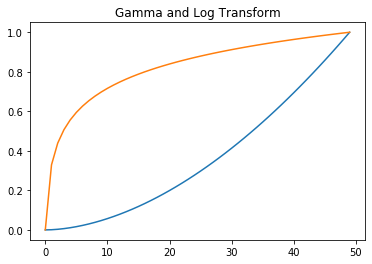

In [5]:
plt.plot(minmax_scale(np.array(list(map(gamma_xform, np.linspace(0,255))))))
plt.plot(minmax_scale(np.array(list(map(log_xform, np.linspace(0,255))))))
plt.title('Gamma and Log Transform')
plt.show()

## Question 2
Using built-in functions in Matlab or Python to perform contrast stretching for images pollen-lowcontrast.tif,
aerialview-washedout.tif, skeleton.tif, and spine.tif

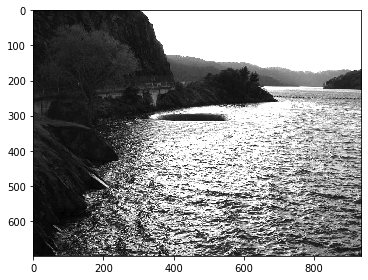

In [6]:
scaled_img = exposure.rescale_intensity(img)
io.imshow(scaled_img)

## Question 3
Image histograms

3a) Write a function h = imageHist(f, mode) for computing the histogram of a 256-level grayscale image, f,
whose intensities are nonnegative. If mode = ‘n’, the histogram should be normalized (default). Otherwise,
if mode = ‘u’, the histogram should be unnormalized.

In [7]:
def imageHist(f, mode='n'):
    f = np.round(f)
    output = np.zeros(np.max(f) + 1)
    ncol, nrows = np.shape(f)
    n = ncol*nrows
    for col in f:
        for val in col:
            output[val] += 1 if mode == 'u' else 1/n  
    return output 

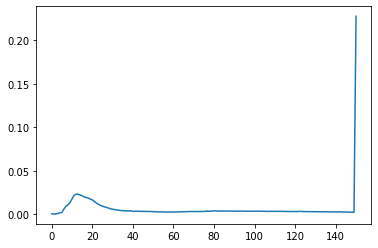

In [8]:
img_hist = imageHist(img)
plt.plot(img_hist)
plt.show()

Comparison with skimage implementation

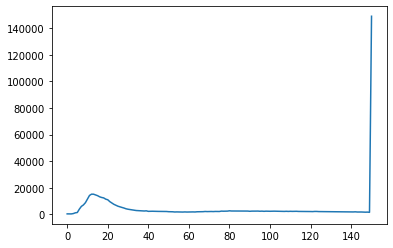

In [9]:
img_hist, centres = exposure.histogram(img)
plt.plot(img_hist)
plt.show()

## Question 4
Histogram equalization

4a) Write a function *g = histEqual(f)* for performing histogram equalization on 8-bit input image *f*

In [10]:
def histEqual(f):
    normalized_hist = imageHist(f,'n')
    s = np.zeros(256)
    for val in range(0,256):
        s[val] = 255 * np.sum(normalized_hist[0:val])
    
    f = np.round(f)
    output = np.array([[s[x] for x in y] for y in f])
    return output

4b) Histogram equalize the image spillway-horse.tif.

<Figure size 432x288 with 0 Axes>

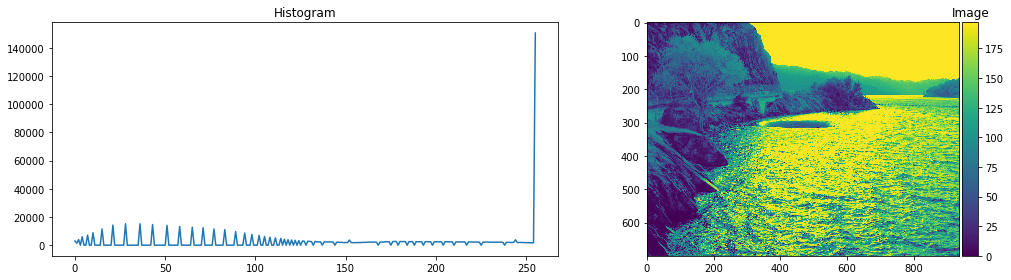

In [11]:
eq_img = histEqual(img)
eq_img_hist, _ = exposure.histogram(eq_img)

plt.tight_layout()
plt.figure(num=None, figsize=(15, 4))

plt.subplot(1,2,1)
plt.plot(eq_img_hist)
plt.title('Histogram')

plt.subplot(1,2,2)
io.imshow(eq_img)
plt.title('Image')

plt.show()

4c) Histogram equalize the image hidden-horse.tif.

<Figure size 432x288 with 0 Axes>

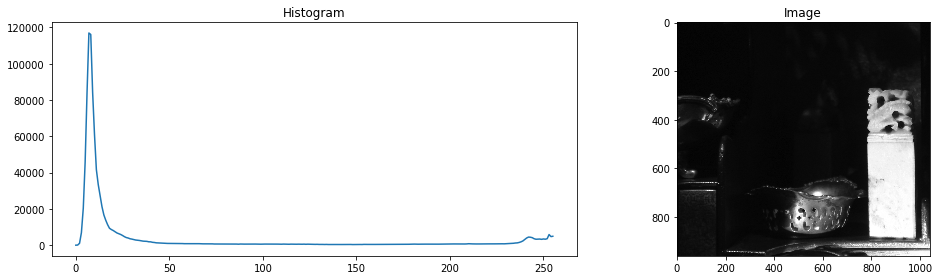

In [12]:
img = io.imread('hidden-horse.tif')
img_hist, centres =  exposure.histogram(img)

plt.tight_layout()
plt.figure(num=None, figsize=(15, 4))

plt.subplot(1,2,1)
plt.plot(img_hist)
plt.title('Histogram')

plt.subplot(1,2,2)
io.imshow(img)
plt.title('Image')

plt.show()

<Figure size 432x288 with 0 Axes>

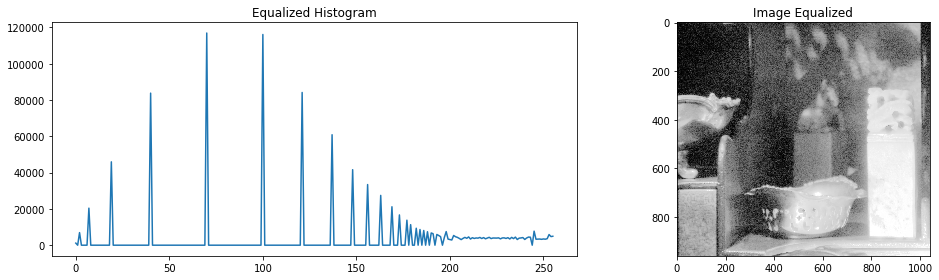

In [13]:
eq_img = exposure.equalize_hist(img)
eq_img_hist, centres = exposure.histogram(eq_img)

plt.tight_layout()
plt.figure(num=None, figsize=(15, 4))

plt.subplot(1,2,1)
plt.plot(eq_img_hist)
plt.title('Equalized Histogram')

plt.subplot(1,2,2)
io.imshow(eq_img)
plt.title('Image Equalized')

plt.show()

## Question 5

Piecewise transformation


Highlight a specific range of intensity values

In [14]:
def pwXform(f, start_val=80, end_val=160):
    norm_input = minmax_scale(f, (0,256))
    return np.array([[200 if x > start_val and x < end_val else 0 for x in y] for y in norm_input])

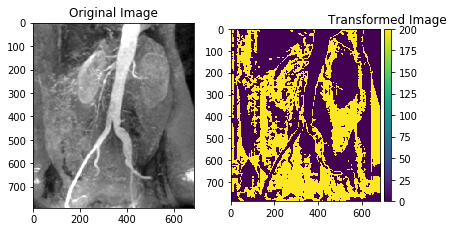

In [15]:

img = io.imread('angiogram-aortic-kidney.tif')

pwXform_img = pwXform(img)

plt.subplot(1,2,1)
io.imshow(img)
plt.title('Original Image')

plt.subplot(1,2,2)
io.imshow(pwXform_img)
plt.title('Transformed Image')

plt.show()

## Question 6

Bit plane slicing